In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


In [2]:
# load commodities.csv and separate_datasets.csv from results dir into pandas dataframes
df_commodities = pd.read_csv('results/commodities.csv')
df_separate_datasets = pd.read_csv('results/separate_datasets.csv')


# display commodities.csv
display(df_commodities)
# display separate_datasets.csv
display(df_separate_datasets)


,Unnamed: 0,clf,metric,value,section_split,model,train_type,section_pooling,optimized_section,patient_pooling
0,0,RF,micro precision,0.637816,semantic,ClinicalBERT,finetuned,cls,True,mean
1,1,RF,micro recall,0.450611,semantic,ClinicalBERT,finetuned,cls,True,mean
2,2,RF,macro precision,0.387025,semantic,ClinicalBERT,finetuned,cls,True,mean
3,3,RF,macro recall,0.231953,semantic,ClinicalBERT,finetuned,cls,True,mean
4,4,MLP,micro precision,0.592437,semantic,ClinicalBERT,finetuned,cls,True,mean
...,...,...,...,...,...,...,...,...,...,...
1147,7,MLP,macro recall,0.430705,max,BioBERT,pretrained,mean,False,pca
1148,8,logistic,micro precision,0.672991,max,BioBERT,pretrained,mean,False,pca
1149,9,logistic,micro recall,0.567262,max,BioBERT,pretrained,mean,False,pca
1150,10,logistic,macro precision,0.545564,max,BioBERT,pretrained,mean,False,pca


,Unnamed: 0,section_split,model,train_type,section_pooling,optimized_section,patient_pooling,accuracy
0,0,semantic,ClinicalBERT,finetuned,cls,True,mean,0.960373
1,1,semantic,ClinicalBERT,finetuned,cls,True,pca,0.951049
2,2,semantic,ClinicalBERT,finetuned,cls,False,mean,0.965035
3,3,semantic,ClinicalBERT,finetuned,cls,False,pca,0.955711
4,4,semantic,ClinicalBERT,finetuned,mean,True,mean,0.958042
...,...,...,...,...,...,...,...,...
91,91,max,BioBERT,pretrained,cls,False,pca,0.892774
92,92,max,BioBERT,pretrained,mean,True,mean,0.857809
93,93,max,BioBERT,pretrained,mean,True,pca,0.848485
94,94,max,BioBERT,pretrained,mean,False,mean,0.855478


## Analysis of separate_datasets.csv

In [12]:
# print table of separate_datasets.csv
# display mean accuracy per model
display(df_separate_datasets.groupby(['model']).mean().reset_index().sort_values(by='accuracy', ascending=False))

# print a latex table of mean accuracy per each one of the following per train_type, section_split, section_pooling, optimized_section, patient_pooling
coloumns_to_display = ['train_type', 'section_split', 'section_pooling', 'optimized_section', 'patient_pooling']
latex_big_table = ""
#for col in coloumns_to_display:
    #print(f"Mean accuracy per {col}:")
#    cur_df = df_separate_datasets.groupby([col]).mean().reset_index().sort_values(by='accuracy', ascending=False).to_latex(index=False)
    # add to latex_big_table
    #latex_big_table += cur_df + "\n\n"

# remove \toprule, \midrule, \bottomrule, \begin{tabular}, \end{tabular} except for the first one
#latex_big_table = latex_big_table.replace('\\toprule', '')
#latex_big_table = latex_big_table.replace('\\midrule', '')
#latex_big_table = latex_big_table.replace('\\bottomrule', '')
#print(latex_big_table)

display(df_separate_datasets.groupby(['section_split', 'section_pooling', 'optimized_section']).mean().reset_index().sort_values(by='accuracy', ascending=False))

,model,Unnamed: 0,optimized_section,accuracy
1,ClinicalBERT,31.5,0.5,0.924534
2,ClinicalBERT_Discharge_Summary_BERT,47.5,0.5,0.912806
0,BioBERT,63.5,0.5,0.905012


,section_split,section_pooling,optimized_section,Unnamed: 0,accuracy
4,semantic,cls,False,22.5,0.948524
5,semantic,cls,True,20.5,0.944444
6,semantic,mean,False,26.5,0.938423
7,semantic,mean,True,24.5,0.934732
1,max,cls,True,68.5,0.904817
0,max,cls,False,70.5,0.903652
3,max,mean,True,72.5,0.872183
2,max,mean,False,74.5,0.866162


,accuracy,variable,value
0,0.960373,section_split,semantic
1,0.951049,section_split,semantic
2,0.965035,section_split,semantic
3,0.955711,section_split,semantic
4,0.958042,section_split,semantic
...,...,...,...
571,0.892774,patient_pooling,pca
572,0.857809,patient_pooling,mean
573,0.848485,patient_pooling,pca
574,0.855478,patient_pooling,mean


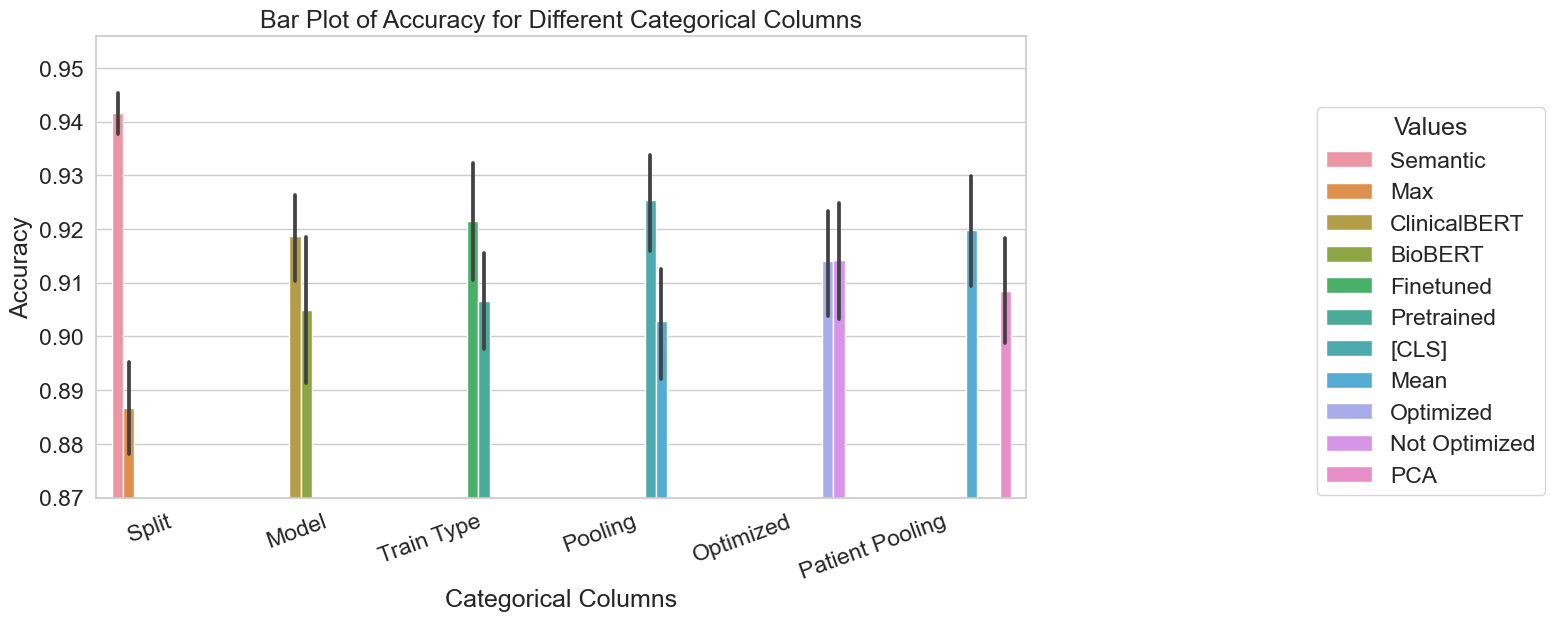

In [25]:
# Plot mean accuracy per every colmns_to_display, each will be different value on x axis
gb_separate_datasets = df_separate_datasets.groupby(coloumns_to_display).mean().reset_index()

# Melt the DataFrame to reshape it for plotting
df_melted = df_separate_datasets.melt(id_vars=['accuracy'], value_vars=['section_split', 'model', 'train_type', 'section_pooling', 'optimized_section', 'patient_pooling'])

display(df_melted)

# # Select the top 3 unique values for each category on the x-axis
# df_top_values = df_melted.groupby(['variable', 'value'])['accuracy'].max().reset_index()
# df_top_values = df_top_values.groupby('variable').apply(lambda x: x.nlargest(3, 'accuracy')).reset_index(drop=True)

# change values and variable to be more readable
df_melted['value'] = df_melted['value'].replace({'semantic':'Semantic','max':'Max','finetuned': 'Finetuned', 'pretrained':'Pretrained','cls':'[CLS]','mean':'Mean', True:'Optimized',False:'Not Optimized', 'pca':'PCA', 'ClinicalBERT_Discharge_Summary_BERT':'ClinicalBERT_Discharge',})
df_melted['variable'] = df_melted['variable'].replace({'section_split': 'Split', 'model': 'Model', 'train_type': 'Train Type', 'section_pooling': 'Pooling', 'optimized_section': 'Optimized', 'patient_pooling': 'Patient Pooling'})

# Create the bar plot
plt.figure(figsize=(12, 6))
# incease font size
sns.set(font_scale=1.5)
# change style and background color
sns.set_style('whitegrid')
sns.barplot(data=df_melted, x='variable', y='accuracy', hue='value')
#sns.barplot(data=df_melted_limited, x='variable', y='accuracy', hue='value')
#sns.barplot(data=df_top_values, x='variable', y='accuracy', hue='value')
plt.xlabel('Categorical Columns')
plt.ylabel('Accuracy')
plt.ylim(0.87, 0.956)
plt.title('Bar Plot of Accuracy for Different Categorical Columns')
plt.legend(title='Values', loc='lower right', bbox_to_anchor=(1.57, -0.02))
plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Analysis of df_commodities.csv

,Unnamed: 0,clf,metric,accuracy,section_split,model,train_type,section_pooling,optimized_section,patient_pooling
0,0,RF,micro precision,0.637816,semantic,ClinicalBERT,finetuned,cls,True,mean
1,1,RF,micro recall,0.450611,semantic,ClinicalBERT,finetuned,cls,True,mean
2,2,RF,macro precision,0.387025,semantic,ClinicalBERT,finetuned,cls,True,mean
3,3,RF,macro recall,0.231953,semantic,ClinicalBERT,finetuned,cls,True,mean
4,4,MLP,micro precision,0.592437,semantic,ClinicalBERT,finetuned,cls,True,mean
...,...,...,...,...,...,...,...,...,...,...
1147,7,MLP,macro recall,0.430705,max,BioBERT,pretrained,mean,False,pca
1148,8,logistic,micro precision,0.672991,max,BioBERT,pretrained,mean,False,pca
1149,9,logistic,micro recall,0.567262,max,BioBERT,pretrained,mean,False,pca
1150,10,logistic,macro precision,0.545564,max,BioBERT,pretrained,mean,False,pca


,accuracy,variable,value
0,0.637816,clf,RF
1,0.450611,clf,RF
2,0.387025,clf,RF
3,0.231953,clf,RF
4,0.592437,clf,MLP
...,...,...,...
8059,0.430705,patient_pooling,pca
8060,0.672991,patient_pooling,pca
8061,0.567262,patient_pooling,pca
8062,0.545564,patient_pooling,pca


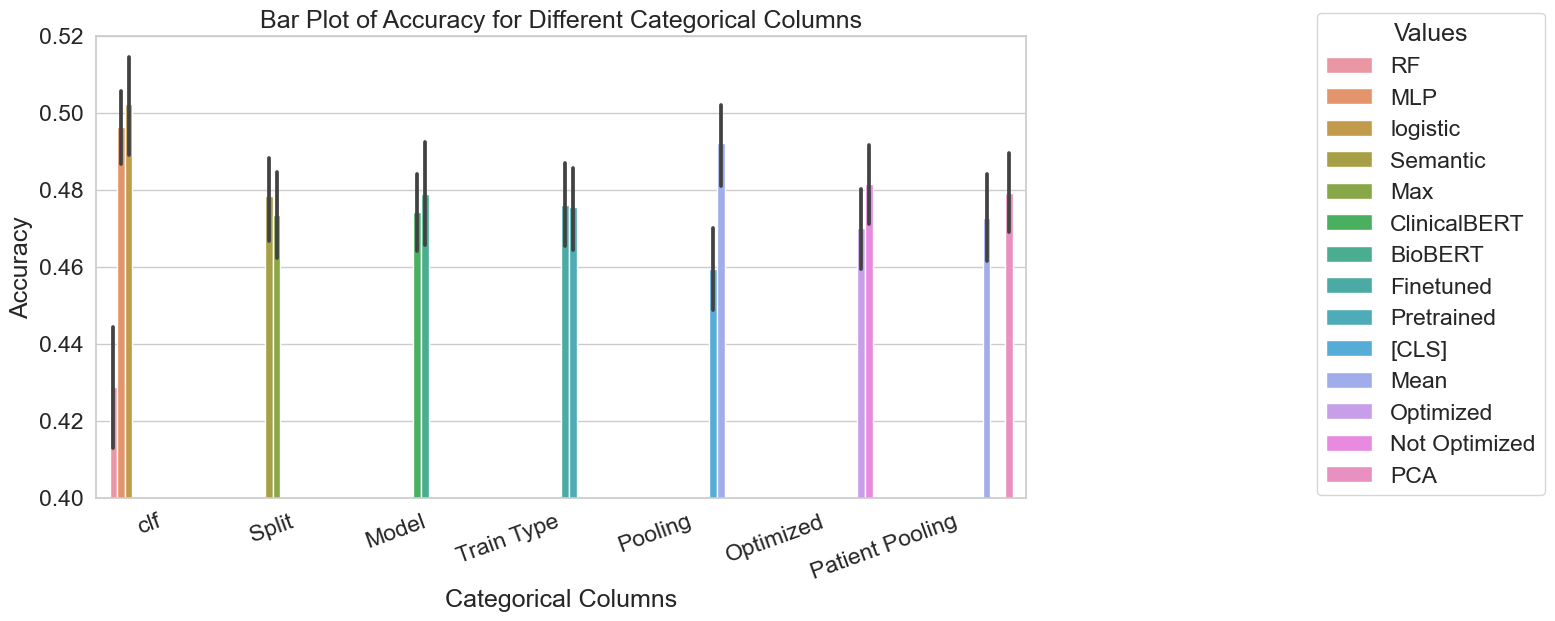

In [29]:
# Melt the DataFrame to reshape it for plotting
display(df_commodities)
# change the name of the value column to accuracy
df_commodities = df_commodities.rename(columns={'value': 'accuracy'})
df_melted = df_commodities.melt(id_vars=['accuracy'], value_vars=['clf','section_split', 'model', 'train_type', 'section_pooling', 'optimized_section', 'patient_pooling'])
display(df_melted)
# change values and variable to be more readable
df_melted['value'] = df_melted['value'].replace({'semantic':'Semantic','max':'Max','finetuned': 'Finetuned', 'pretrained':'Pretrained','cls':'[CLS]','mean':'Mean', True:'Optimized',False:'Not Optimized', 'pca':'PCA', 'ClinicalBERT_Discharge_Summary_BERT':'ClinicalBERT_Discharge',})
df_melted['variable'] = df_melted['variable'].replace({'section_split': 'Split', 'model': 'Model', 'train_type': 'Train Type', 'section_pooling': 'Pooling', 'optimized_section': 'Optimized', 'patient_pooling': 'Patient Pooling'})

# Create the bar plot
plt.figure(figsize=(12, 6))
# incease font size
sns.set(font_scale=1.5)
# change style and background color
sns.set_style('whitegrid')
sns.barplot(data=df_melted, x='variable', y='accuracy', hue='value')
#sns.barplot(data=df_melted_limited, x='variable', y='accuracy', hue='value')
#sns.barplot(data=df_top_values, x='variable', y='accuracy', hue='value')
plt.xlabel('Categorical Columns')
plt.ylabel('Accuracy')
plt.ylim(0.4, 0.52)
plt.title('Bar Plot of Accuracy for Different Categorical Columns')
plt.legend(title='Values', loc='lower right', bbox_to_anchor=(1.57, -0.02))
plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better visibility
plt.show()